# Tutorial 5
Let's first import some libraries...

In [2]:
import numpy as np
import matplotlib.pyplot as plt

## 1. Preallocate arrays

For large arrays, it is more efficient to preallocate your arrays than to change its size on the fly. In other words, we want to avoid "append". Let's take a closer look...

In [8]:
%%timeit
# we initialise an empty Python list
A = [] 
for i in range(1000):
    # we append 1000 elements in the array
    A.append(i)

49.4 µs ± 1.93 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [10]:
%%timeit
# now we append to a numpy array...
B = np.zeros((0))
for i in range(1000):
    # note that the Python list.append() will not work for numpy arrays!
    B = np.append(B,i)

3.71 ms ± 97.7 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


Now let's how much faster it is if we were to preallocate the array:

In [11]:
%%timeit
# this is how we preallocate an pure Python list
C = [0]*1000
for i in range(1000):
    C[i] = i

28.2 µs ± 363 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [12]:
%%timeit
D = np.zeros((1000))
for i in range(1000):
    D[i] = i

77.3 µs ± 2.96 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


We get a speed-up of **2 times** for the normal Python list, and a speed-up of **48 times** for the numpy array!

-----

## 2. Careful iteration through a for-loop

We should try to 

 1. loop through the most relevant axis of the array,
 2. use enumerate when needed, and
 3. use numpy functions, e.g. sum() as much as possible:

In [34]:
%%timeit
np.random.seed(555)
A = np.random.random((1000,5,5))
B = np.zeros((1000))
for idx, a in enumerate(A):
    B[idx] = a.sum()

2.02 ms ± 28.5 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [32]:
%%timeit
np.random.seed(555)
A = np.random.random((1000,5,5))
B = np.zeros((1000))
for idx in range(1000):
    b = 0
    for i in range(5):
        for j in range(5):
            # this is equivalent to b = b + A[idx,i,j]
            b += A[idx,i,j] 
    B[idx] = b

4.51 ms ± 19.3 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [3]:
%%timeit
np.random.seed(555)
A = np.random.random((1000,5,5))
B = np.zeros((1000))
B[...] = A.sum(axis=(1,2))

152 µs ± 5.59 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


-----

## 3. Computer precision
Numbers in a computer are stored as, for example, `int` (integers) or `float` (decimal point numbers). The implication of this is that there is a finite precision of how a computer can store, compute, and process numbers. 

See [floating-point arithmetic](https://en.wikipedia.org/wiki/Floating-point_arithmetic) for more details.

In [9]:
# Let's draw a random number and check what is its type:
A = np.random.random()
print("Type of a random number =", type(A))
print("Random number is", A)

# Now let's check the precision of a float
print("Precision of a 'float' is", np.finfo(float).precision)
# This means that a float is only able to store up to 15 decimal places accurately.

print("")

# Let's artifically create a very long number by
# first creating a string of text...
string = ''
np.random.seed(555)
for _ in range(25):
    string = string + str(np.random.randint(0,10))
    
# Now we print the string and its length:
print("We obtained a string %s of length %i" %(string,len(string)))

# Now we convert the string to a float:
print("Converting the string to float:", float(string))

Type of a random number = <class 'float'>
Random number is 0.206334907384653
Precision of a 'float' is 15

We obtained a string 9146690504665504194393334 of length 25
Converting the string to float: 9.146690504665504e+24


You can see that everything after the 15th decimal place have been truncated, i.e. lost, because the precision of a float on a computer is only up to 15 decimal places!

There are "more precise" floating-point number types but we should generally avoid them, e.g. numpy's `long double`. See [Numpy's data types page](https://numpy.org/doc/stable/user/basics.types.html) for more details.

In [10]:
print("Precision of a 'long double' is", np.finfo(np.longdouble).precision)

# With a long double, we have gained 4 decimal places of precision!
print(np.longdouble(string))

Precision of a 'long double' is 18
9.1466905046655041945e+24


-----

## 4. Numpy broadcasting, slicing, and vectorisation

These are three big topics, and I encourage you to read up on it on your own.

Here, we look at them briefly, and we will be using more examples through the tutorial.

### 4.1: Broadcasting

We have already seen this in the computation of the kinetic and potential energy of the simple harmonic oscillator. Basically, numpy allows us to do element-wise operations on arrays:

In [42]:
np.random.seed(555)
A = np.random.random((10,10))
print(A[1])

# this is equivalent to A = A * 2.0
A *= 2.0
print(A[1])

[0.23976742 0.03450459 0.14859311 0.81086617 0.65310538 0.54446869
 0.04119477 0.46816625 0.88874673 0.47625856]
[0.47953484 0.06900918 0.29718623 1.62173235 1.30621075 1.08893737
 0.08238953 0.9363325  1.77749347 0.95251711]


### 4.2: Slicing
Slicing are fancy ways of indexing an array in Python. Normally, how you would index is `a = A[5,5]`.

Let's take a look at a few examples of slices:

In [27]:
# A is a 12x12 array
A = np.arange(144).reshape(12,12)
print("A.shape = ", A.shape)

# Now let's say we want to access only access the middle 10 elements:
B = A[1:-1,1:-1]
# The comand in the square brackets says: 
# let's take all elements not including the first element 
# and not including last element in both the x and y directions.
print("B.shape = ", B.shape)

# This says: let's only take all elements not including 
# the first element and not including last element in
# the x-direction; leave the y-axis alone.
C = A[1:-1,:]
print("C.shape = ", C.shape)

# Let's define a high-dimensional array
D = np.arange(6720).reshape(4,5,6,7,8)
print("D.shape = ", D.shape)

# But let's pretend that we do not know the shape of 
# the array, except that the the first two axes are
# the grid that we want to remove the last two indices
# off the second axis:
E = D[:,:-2,...]
print("E.shape = ", E.shape)

# The three dots are Python ellipsis and they can be used
# in a few tricks...
F = np.arange(25).reshape(5,5)
print("F.shape = ", F.shape)

F = 0.0
# We have set F from a 5x5 array to a float that is zero!
print("F = ", F)

G = np.arange(25).reshape(5,5)
# print("G = \n", G)
# But with the ellipses, we can set *all* elements to zero instead.
G[...] = 0.0
print("G = \n", G)

A.shape =  (12, 12)
B.shape =  (10, 10)
C.shape =  (10, 12)
D.shape =  (4, 5, 6, 7, 8)
E.shape =  (4, 3, 6, 7, 8)
F.shape =  (5, 5)
F =  0.0
G = 
 [[0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]]


In [28]:
# Ellipsis can also be used as an implicit assert statement
# to make sure that we do not change the size of our
# arrays unwittingly
H = np.arange(125).reshape(5,5,5)
I = np.arange(150).reshape(6,5,5)

# We want to preserve the (5,5,5) structure, but make H
# an array that is 5 times of I:
J = np.copy(H)
print("original shape of J = \n", J.shape)
J = I
print("shape after improper assignment of J = \n", J.shape)

# But with the ellipsis, we implicitly assert that the shape
# of the array cannot be changed!
K = np.copy(H)
print("original shape of K = \n", K.shape)
K[...] = I

original shape of J = 
 (5, 5, 5)
shape after improper assignment of J = 
 (6, 5, 5)
original shape of K = 
 (5, 5, 5)


ValueError: could not broadcast input array from shape (6,5,5) into shape (5,5,5)

In [37]:
# Let us take a short look into slice functions...
# We have seen this before.
A = np.arange(144).reshape(12,12)
print("A.shape = ", A.shape)
B = A[1:-1,1:-1]
print("B.shape = ", B.shape)

# this is equivalent to the indexing we saw before...
slc = (slice(1,-1),slice(1,-1))
C = A[slc]
print("C.shape = ", C.shape)

# A nice thing about the slice function is dimension-free slicing:
D = np.arange(6720).reshape(4,5,6,7,8)

# slc_dfree = []
# for _ in range(D.ndim):
#     slc_dfree.append(slice(1,-1))
# slc_dfree = tuple(slc_dfree)

slc_dfree = tuple([slice(1,-1)]*D.ndim)

print("Our dimension-free slicer is", slc_dfree)
# How does it work then?
E = D[slc_dfree]
print("E.shape = ", E.shape)

A.shape =  (12, 12)
B.shape =  (10, 10)
C.shape =  (10, 10)
Our dimension-free slicer is (slice(1, -1, None), slice(1, -1, None), slice(1, -1, None), slice(1, -1, None), slice(1, -1, None))
E.shape =  (2, 3, 4, 5, 6)


### 4.3: Vectorisation
We have since broadcasting in action... Can we broadcast arrays with different shapes to do some computations?

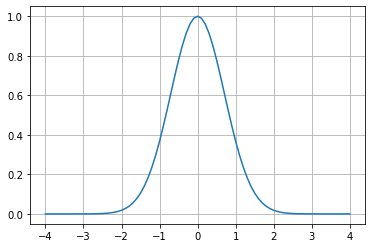

In [21]:
# Set x-extent
xmin = -4
xmax = +4
# Set spatial step-size
dx = 0.1
# Set x-grid
xh = np.arange(xmin,xmax+dx,dx)

# Now, we define a 1D Gaussian function...
x = np.exp(-xh**2)

plt.figure()
plt.plot(xh, x)
plt.grid()
plt.show()

x.shape =  (81,)
X.shape =  (81, 1)
Y.shape =  (1, 81)
Z.shape = (81, 81)


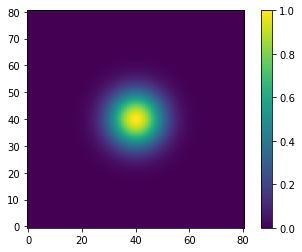

In [22]:
# Now we want to define a 2D Gaussian...
# We want a 2D array with all the elements to be on the first axis
print("x.shape = ", x.shape)

X = x.reshape(-1,1)
print("X.shape = ", X.shape)

# Then we define a second vector with all the elements on the second
# axis
Y = x.reshape(1,-1)
print("Y.shape = ", Y.shape)

# Then we broadcast the arrays together:
Z = X * Y
print("Z.shape =", Z.shape)

plt.figure()
plt.imshow(Z, origin='lower')
plt.colorbar()
plt.show()